In [1]:
import os

import pandas as pd
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")


pd.options.mode.chained_assignment = None

import shapely
from shapely.geometry import LineString

from gtfs_data import GTFSData

data_dir = r'Q:\SACSIM23\Network\TransitNetwork\GTFS\SRTD'
os.chdir(data_dir)

gtfs = GTFSData(gtfs_dir=data_dir, data_year=2020)


# update strings to date time format
gtfs.df_stoptimes = gtfs.df_stoptimes.loc[gtfs.df_stoptimes['arrival_time'] < '24:00:00']
gtfs.df_stoptimes = gtfs.df_stoptimes.loc[gtfs.df_stoptimes['departure_time'] < '24:00:00']
gtfs.df_stoptimes[gtfs.f_depart_time] = pd.to_datetime(gtfs.df_stoptimes[gtfs.f_depart_time])
gtfs.df_stoptimes[gtfs.f_arrive_time] = pd.to_datetime(gtfs.df_stoptimes[gtfs.f_arrive_time])

# IMPORTANTLY, probably need to only include stops with arrival and departure times
gtfs.df_stoptimes = gtfs.df_stoptimes.loc[pd.notnull(gtfs.df_stoptimes['arrival_time'])]


In [2]:
gtfs.df_stoptimes.loc[gtfs.df_stoptimes['trip_id'] == 840400].columns

Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
       'pickup_type', 'drop_off_type'],
      dtype='object')

In [3]:
# for a single trip, get geometry of its trip line shape and geom of stops made on that trip

test_trip_id = 840400 # 't_1063569_b_25331_tn_1'
df_test_trip = gtfs.df_trips.loc[gtfs.df_trips['trip_id'] == test_trip_id]

# create geodataframe of the test trip, with trip data and trip shape
gdf_test_tripshp = df_test_trip.join(gtfs.gdf_lineshps, on='shape_id')
gdf_test_tripshp = gpd.GeoDataFrame(gdf_test_tripshp, geometry='geometry', crs=gtfs.epsg_sacog)

# make point gdf of stop locations along the trip shape
gdf_test_stops = df_test_trip.merge(gtfs.df_stoptimes, on='trip_id') \
                .merge(gtfs.gdf_stops, on='stop_id') \
                [['trip_id', 'stop_id', 'stop_sequence', 'geometry']] \
                .sort_values(by='stop_sequence')
gdf_test_stops = gpd.GeoDataFrame(gdf_test_stops, geometry='geometry') # need this to make geo df instead of regular df


<AxesSubplot:>

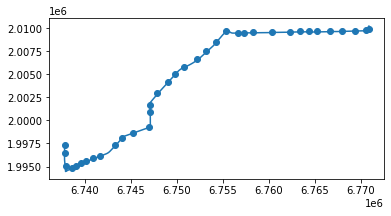

In [5]:
ax = gdf_test_tripshp.plot()
gdf_test_stops.plot(ax=ax)